<a href="https://colab.research.google.com/github/azmirizkilubis/DigitalScholatutorial/blob/main/Portfolio_Associate_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PORTFOLIO ASSOCIATE DATA SCIENTIST**

## **Data Understanding**

> Dataset ini merupakan informasi terkait pelanggan apakah ingin membeli atau tidak terhadap promo barang yang ditawarkan. Diambil beberapa informasi untuk menentukan pelanggan tersebut akan membeli atau tidak. <br>
X1 : Gender <br>
x2 : Age <br>
X3 : Estimated Salary <br>
Y  : Purchased (0: Tidak Membeli, 1: Membeli)

## **Load Library**

In [ ]:
#library data manipulation
import pandas as pd
import numpy as np

#library data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#library data modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#library data evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#library export modelling
import pickle

## **Load Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0


## **Validation Dataset**

In [ ]:
#dimension of dataset
df.shape

(400, 5)

In [ ]:
#deskriptif of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,399.0,3.766917e+01,10.492200,18.0,29.50,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
#inforamtioin of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           398 non-null    object 
 2   Age              399 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


## **Objectif Dataset**

In [ ]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0


In [ ]:
#drop user ID
df = df.drop(['User ID'], axis=1)

df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000,0
1,Male,35.0,20000,0
2,Female,26.0,43000,0


## **Cleaning Dataset**

In [ ]:
df.isnull().sum()

Gender             2
Age                1
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#option 1
# df = df.dropna()

# df.isnull().sum()

In [ ]:
#option 2
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))

df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## **Kontruksi Prediktor Dataset**

In [ ]:
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000,0
1,Male,35.0,20000,0
2,Female,26.0,43000,0


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female':0})

scaler = StandardScaler()
df.iloc[:,1:3] = scaler.fit_transform(df.iloc[:,1:3])

df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.783634,-1.490046,0
1,1,-0.254873,-1.460681,0
2,0,-1.114801,-0.785290,0


## **Labaelling Dataset**

In [ ]:
df['Purchased'].unique()

array([0, 1])

In [ ]:
df['Purchased'] = df['Purchased'].map({0:'Tidak Membeli', 1:'Akan Membeli'})

df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.783634,-1.490046,Tidak Membeli
1,1,-0.254873,-1.460681,Tidak Membeli
2,0,-1.114801,-0.785290,Tidak Membeli


## **Visualization Dataset**

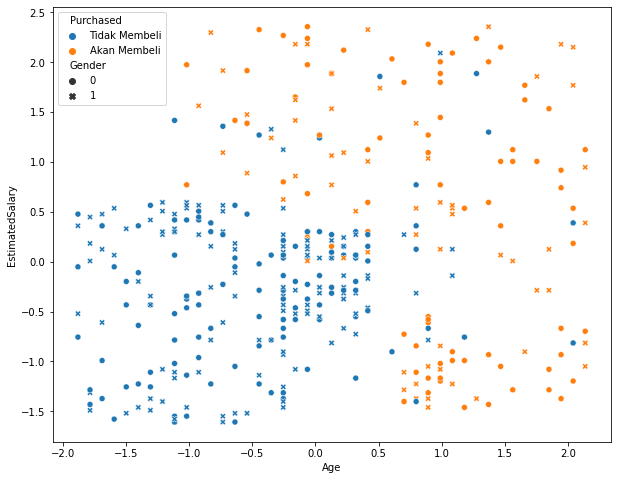

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Gender')
plt.show()

## **Modelling Dataset**

In [ ]:
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=14)

model_svm = SVC(kernel='rbf')
model_svm.fit(x_train, y_train)

with open('model_svm.pkl', 'wb') as file:
  pickle.dump(model_svm, file)

## **Evaluation Modelling**

In [ ]:
y_predict = model_svm.predict(x_test)
print(f"Classification Report \n {classification_report(y_test, y_predict)}")

Classification Report 
                precision    recall  f1-score   support

 Akan Membeli       0.81      0.91      0.85        32
Tidak Membeli       0.93      0.85      0.89        48

     accuracy                           0.88        80
    macro avg       0.87      0.88      0.87        80
 weighted avg       0.88      0.88      0.88        80



In [ ]:
print(f"Confusion Matrix Report \n {confusion_matrix(y_test, y_predict)}")

Confusion Matrix Report 
 [[29  3]
 [ 7 41]]
